# Flight Price Prediction (Evaluation Project - 7)

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

#### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

#### You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/431000f9afc023256e3648cf34103fff7c553666/Flight_Ticket_Participant_Datasets.zip

In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the datasets

train_data = pd.read_excel("Train_set.xlsx")
test_data = pd.read_excel("Test_set.xlsx")

In [3]:
# Let's merge the both datasets

train_data["Demo_Data"] = 1111
test_data["Demo_Data"] = 2222

data = pd.concat([train_data, test_data], ignore_index=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Demo_Data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1111
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1111
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1111
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1111
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1111


In [4]:
# We are going to delete the columns Arrial_Time and Dep_Time because we have Duration Column

data.drop(columns = ["Arrival_Time","Dep_Time"], axis=1, inplace=True)

In [5]:
# Shape of both datasets

print("Shape of Train Dataset : ",data.shape)

Shape of Train Dataset :  (13354, 10)


In [6]:
# Quick information about datasets

print("\nInformation about Dataset\n================================\n")
data.info()


Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Demo_Data        13354 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.0+ MB


All columns are in object form so that skewness issue is not exists.....

In [7]:
# Null value of Train Dataset

print("\nNull Values of Dataset\n============================")
data.isnull().sum()


Null Values of Dataset


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Demo_Data             0
dtype: int64

Route and Total_Stopes each have only 1 null value. we will fill it with their mode() values.

In [8]:
# Let's check the value counts of each object column for train dataset

for col in data.columns:
    if data[col].dtype=='object':
        print(data[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
27/06/2019    430
1/06/2019     430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195

Jet Airways and Jet Airways Business are same

Multiple carriers Premium economy and Multiple carriers are same

Vistara Premium economy and Vistara are same

No info and No Info are same

Let's replace them...

In [9]:
# Let's solve the above problem

data["Airline"].replace("Jet Airways Business", "Jet Airways", inplace=True)
data["Airline"].replace("Multiple carriers Premium economy", "Multiple carriers", inplace=True)
data["Airline"].replace("Vistara Premium economy", "Vistara", inplace=True)

In [10]:
# Filling Null Values

data["Route"] = data["Route"].fillna(data["Route"].mode()[0])
data["Total_Stops"] = data["Total_Stops"].fillna(data["Total_Stops"].mode()[0])

# Let' again check the null values

print("\nNull Values of Train Dataset\n============================")
data.isnull().sum()


Null Values of Train Dataset


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Demo_Data             0
dtype: int64

All null values of Train Dataset has been fixed. Now let's check the test dataset..

In [11]:
# Let's check the Airlies data in Dataset

data["Airline"].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

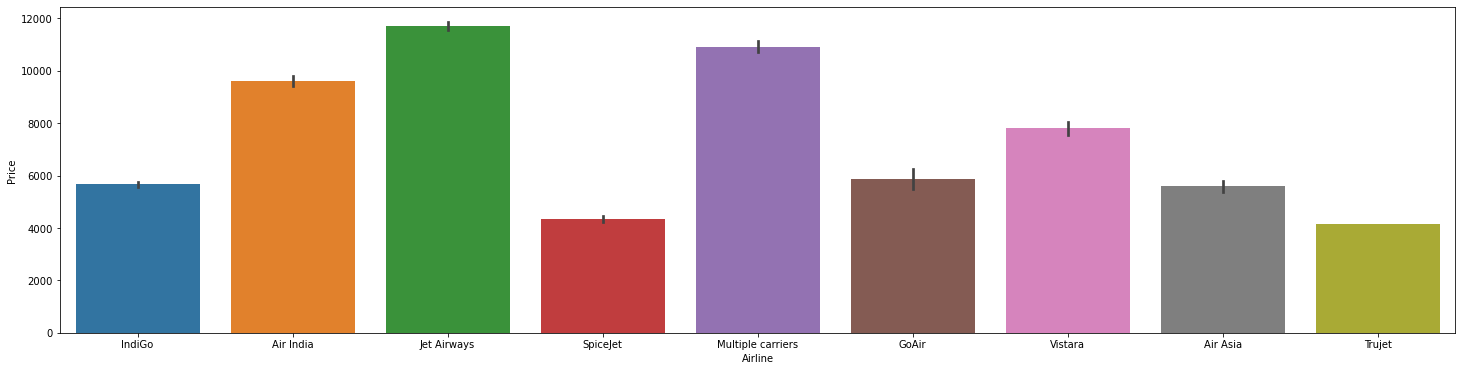

In [12]:
# Let's check the Airline Business

plt.figure(figsize=(25,6))
sns.barplot(x="Airline", y="Price", data=data)

<AxesSubplot:xlabel='Source', ylabel='count'>

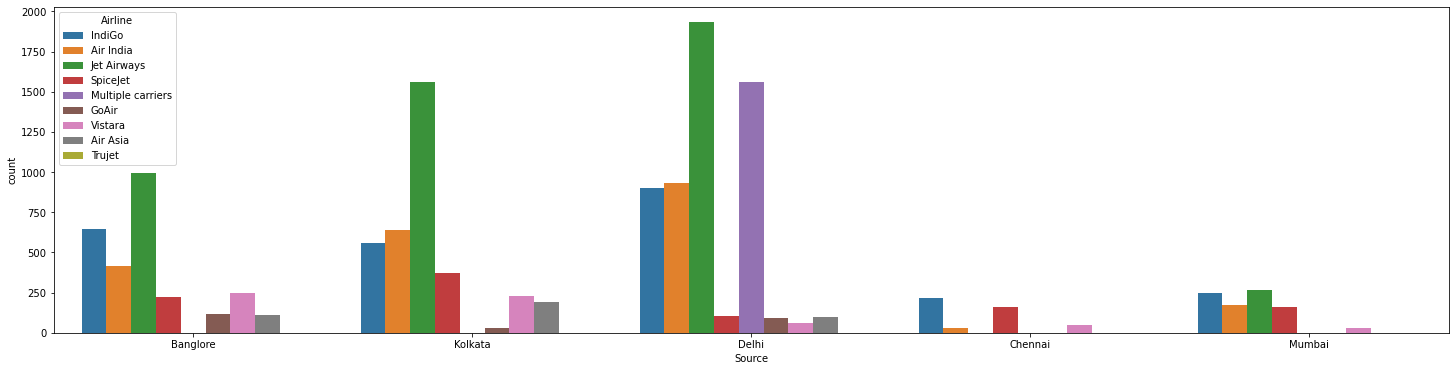

In [13]:
# Let's check the most popular flight region wise

plt.figure(figsize=(25,6))
sns.countplot(x="Source", data=data, hue="Airline")

In [14]:
# Let's use the one hot encoding technique on Train Dataset and transfer the object columns to numerical 

print("Shape before converting the object column to numerical : ",data.shape)
data = pd.get_dummies(data, drop_first=True)
print("Shape after converting the object column to numerical  : ",data.shape)

Shape before converting the object column to numerical :  (13354, 10)
Shape after converting the object column to numerical  :  (13354, 579)


In [16]:
# Let's separate the train data and test data

df_test = data.loc[data["Demo_Data"]==2222]
df_train = data.loc[data["Demo_Data"]==1111]

In [19]:
# Reseting the indexes

df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

print("Shape of Train Dataset : ",df_train.shape)
print("Shape of Test Dataset  : ",df_test.shape)

Shape of Train Dataset :  (10683, 579)
Shape of Test Dataset  :  (2671, 579)


In [38]:
# Let's drop the Demo Data column from the test dataset as that is the  output variable to be predict

df_test.drop(columns = ["Demo_Data", "Price"], axis=1, inplace=True)

In [21]:
# Let's separate input and target column from the train dataset

x = df_train.drop(columns = ["Price", "Demo_Data"], axis=1)
y = df_train["Price"]

Number of components explained 95% variance :  209


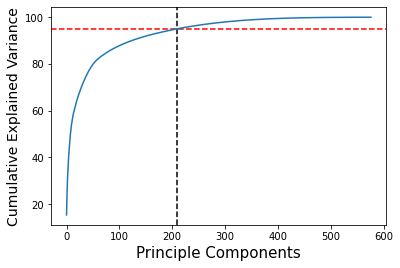

In [22]:
# Let' use th PCA technique

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca = PCA()
x_pca.fit(x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

print("Number of components explained 95% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

Out of 579, 209 features is giving the 95% variance. So, let's use the PCA Scaling for model building...

In [23]:
# Let's use the PCA Scaling

pca = PCA(n_components=209)
df_x = pca.fit_transform(x)

In [24]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [25]:
# Let's find the best random state

def randomstate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,6):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.22, random_state=i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Beset R2_Score is         : ",max_score)
    print("Cross Validation score is : ",cross_val_score(mod, df_x, y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [26]:
# Linear Regression

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
randomstate(LR)

Best Random State is      :  2
Beset R2_Score is         :  0.7790117764923644
Cross Validation score is :  0.7313904001519199
Time taken by model for prediction : 1.4506 seconds


In [27]:
# Format for all models

def bestmodel(model):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.22, random_state=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print("Best R2_Score is : ",score)
    print("Cross Validation Score is : ",cross_val_score(model, df_x, y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [28]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
bestmodel(DTR)

Best R2_Score is :  0.7421015389313347
Cross Validation Score is :  0.7362057833976563
Time taken by model for prediction : 24.6779 seconds


In [29]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
bestmodel(KNR)

Best R2_Score is :  0.8160337351968967
Cross Validation Score is :  0.7795085397909247
Time taken by model for prediction : 6.3334 seconds


In [31]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
bestmodel(RFR)

Best R2_Score is :  0.8694854631562586
Cross Validation Score is :  0.8436250282873459
Time taken by model for prediction : 1326.4042 seconds


#### After analyzing the scores and cross validation scores of above 4 models. Now it is clear that random forest regressor is giving the best score. So, let's try to increase the score using hyperparameter tuning...

In [33]:
# Final Model With HyperParameter Tuning

#x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.22, random_state=2)

#from sklearn.model_selection import GridSearchCV

#param_grid = {"n_estimators":[100,200], "criterion": ["mse", "mae"],
#             "min_samples_split": [2,3], "min_samples_leaf": [1,2]}

#grid_search = GridSearchCV(RFR, param_grid)

#grid_search.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = 2)
Final_Model = RandomForestRegressor(n_estimators=100, criterion="mse", min_samples_split=2, min_samples_leaf=1)
Final_Model.fit(x_train, y_train)
y_preds = Final_Model.predict(x_test)
r2_score(y_test, y_preds)

0.8695269224253188

In [39]:
# Now let's transfer test_data according to pca for sales prediction

test_data_pca = pca.transform(df_test)
price_pred = Final_Model.predict(test_data_pca)

predict_price = pd.DataFrame(price_pred, columns = ["Price"])

# Let's save the predicted price to the csv file

predict_price.to_csv("Predicted Final Price.csv", index=False)

In [40]:
# Saving the Final Model

import joblib

joblib.dump(Final_Model, "Final_Predicted_Price_Model.pkl")

['Final_Predicted_Price_Model.pkl']